In [4]:
#3.1

#求定积分符号解答，可以使用sympy中的integrate函数
#(1)
import scipy.optimize
import sympy as sym
x = sym.symbols('x')
num = sym.integrate(sym.sqrt(1+4*x),(x,0,1))
print(num)
#(2)
num = sym.integrate(sym.exp(-x)*sym.sin(x),(x,0,sym.oo))
print(num)

-1/6 + 5*sqrt(5)/6
1/2


In [57]:
#3.2

# 注意如果要取出复数部分，只保留实数部分可以使用 solvest函数
#另外求解器是会根据输入进行判别输出为什么类型的数据，比如输入的是整数，则输出完整的符号；输入的是浮点数，输出则为浮点数
#scipy貌似对求解复数问题不适用

#求普通方程的符号解和数值解
# import sympy as sym
# import numpy as np
# x = sym.symbols('x',real = True)
# expr1 = x**3-4*x**2+6*x-8#构造等式，然后再来解一元三次方程
# num = sym.solveset(expr1,x)#求解根
# print('调用sympy求得的符号解为：{}'.format(num))
# print(sym.roots(expr1,x))#查看重根情况
# import scipy as sci
# f = lambda x : x**3-4*x**2+6*x-8
# print(sci.optimize.fsolve(f,0))
import sympy as sym
import numpy as np
x = sym.symbols('x')
expr1 = x**3-4*x**2+6*x-8#构造等式，然后再来解一元三次方程
num = sym.solve(expr1,x)#求解根
print('调用sympy求得的符号解为：{}'.format(num))
print(sym.roots(expr1,x))#查看重根情况
print('*'*20)
expr2 = x**3-4.*x**2+6.*x-8.#构造等式，然后再来解一元三次方程
num2 = sym.solve(expr2,x)#求解根
print('调用sympy求得的符号数值解为：{}'.format(num2))
print(sym.roots(expr2,x))#查看重根情况

调用sympy求得的符号解为：[4/3 + (-1/2 - sqrt(3)*I/2)*(64/27 + 2*sqrt(114)/9)**(1/3) - 2/(9*(-1/2 - sqrt(3)*I/2)*(64/27 + 2*sqrt(114)/9)**(1/3)), 4/3 - 2/(9*(-1/2 + sqrt(3)*I/2)*(64/27 + 2*sqrt(114)/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(64/27 + 2*sqrt(114)/9)**(1/3), -2/(9*(64/27 + 2*sqrt(114)/9)**(1/3)) + 4/3 + (64/27 + 2*sqrt(114)/9)**(1/3)]
{-2/(9*(64/27 + 2*sqrt(114)/9)**(1/3)) + 4/3 + (64/27 + 2*sqrt(114)/9)**(1/3): 1, 4/3 - 2/(9*(-1/2 + sqrt(3)*I/2)*(64/27 + 2*sqrt(114)/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(64/27 + 2*sqrt(114)/9)**(1/3): 1, 4/3 + (-1/2 - sqrt(3)*I/2)*(64/27 + 2*sqrt(114)/9)**(1/3) - 2/(9*(-1/2 - sqrt(3)*I/2)*(64/27 + 2*sqrt(114)/9)**(1/3)): 1}
********************
调用sympy求得的符号数值解为：[2.88123940107640, 0.559380299461801 - 1.56961032188996*I, 0.559380299461801 + 1.56961032188996*I]
{2.88123940107640: 1, 0.559380299461801 - 1.56961032188996*I: 1, 0.559380299461801 + 1.56961032188996*I: 1}


In [98]:
#3.3

#求方程组的符号解和数值解
x,y = sym.symbols('x y')
s = sym.solve([x**2-y-x-3,x+3*y-6],[x,y])
print('方程的符号解为：',s)
s = sym.solve([x**2-y-x-3.,x+3.*y-6.],[x,y])
print('方程的符号化简数值解为：',s)
s= sym.nsolve((x**2-y-x-3,x+3*y-6),(x,y),(-1,2))
print(s)
s= sym.nsolve((x**2-y-x-3,x+3*y-6),(x,y),(1,2))
print(s)
#发现一个很奇特的现象，如果你想求方程组的符号解，原方程输入即可
#要求数值解，直接将数字变为浮点型恐怕更简单易用
#另外，使用nsolve解函数时，提供的初值对于函数的输出会有影响，并且无法知晓函数到底有多少解
#百度了很久，也没有合适的解答,这先存疑》》》》

方程的符号解为： [(1/3 - sqrt(46)/3, sqrt(46)/9 + 17/9), (1/3 + sqrt(46)/3, 17/9 - sqrt(46)/9)]
方程的符号化简数值解为： [(-1.92744332770842, 2.64248110923614), (2.59410999437509, 1.13529666854164)]
Matrix([[-1.92744332770842], [2.64248110923614]])
Matrix([[2.59410999437509], [1.13529666854164]])


In [100]:
#3.4

#求微分方程的符号解
x = sym.symbols('x')
y = sym.symbols('y',cls = sym.Function)#定义y为函数
eq1 = sym.diff(y(x),x,2) + y(x) -x*sym.cos(2*x)
print('边值问题的解为：{}'.format(sym.dsolve(eq1,y(x),ics={y(0):1,y(2):3})))

边值问题的解为：Eq(y(x), -x*cos(2*x)/3 + (6*cos(4) - 4*sin(4) - 9*cos(2) + 27)*sin(x)/(9*sin(2)) + 4*sin(2*x)/9 + cos(x))


In [116]:
#3.5

#求行列式的值
A1 =sym.Matrix(np.arange(1,7).reshape(3,2))
print(A1)
A2 = sym.Matrix([[1,1], [2,2],[3,4]])
print(A2)
A3 = sym.Matrix([[2,6]])
A4 = sym.Matrix([[3,2]])
B1 = A1.row_join(A2)
B2 = A3.row_join(A4)
A = B1.col_join(B2)
print(A,A.shape)
print('A的行列式为：',sym.det(A))

Matrix([[1, 2], [3, 4], [5, 6]])
Matrix([[1, 1], [2, 2], [3, 4]])
Matrix([[1, 2, 1, 1], [3, 4, 2, 2], [5, 6, 3, 4], [2, 6, 3, 2]]) (4, 4)
A的行列式为： 0


In [137]:
#3.6

#求解线性方程组,可以使用sumpy，也可以使用numpy
#(1)其次线性方程+
A1 = sym.Matrix([[1,2,1,-1],[3,6,-1,-3],[5,10,1,-5]])
print('A的基础解系为：',A.nullspace())
#（2）非齐次线性方程
A2 = sym.Matrix([[2,1,-1,1],[4,2,-2,1],[2,1,-1,-1]])
print(A2.shape)
B = sym.Matrix([[1],[2],[1]])
print(B.shape)
C = A2.row_join(B)#构造增广矩阵
print('增广矩阵的最简形为:',C.rref())#由最简矩阵可知，第1列和第4列为最简坐标向量
#通过等价方程组，即可以解出最终的通解

A的基础解系为： [Matrix([
[   0],
[-1/2],
[   1],
[   0]])]
(3, 4)
(3, 1)
增广矩阵的最简形为: (Matrix([
[1, 1/2, -1/2, 0, 1/2],
[0,   0,    0, 1,   0],
[0,   0,    0, 0,   0]]), (0, 3))


In [146]:
#3.7

#选择numpy
#(1)非齐次线性方程组
import numpy as np
import numpy.linalg as LA
A = np.array([[4,2,-1],[3,-1,2],[11,3,0]])
B = np.array([[2,10,8]]).reshape(3,1)
print('系数矩阵的秩为：',LA.matrix_rank(A))
print('增广矩阵的秩为：',LA.matrix_rank(np.c_[A,B]))#说明系数矩阵的秩小于增广矩阵的秩，方程无解
#（2）题目中有三个变量，但是有四个方程组，这种方程组称为矛盾方程组
C = np.array([[2,3,1],[1,-2,4],[3,8,-2],[4,-1,9]])
D = np.array([[4,-5,13,-6]]).reshape(4,1)
print('系数矩阵的秩为：',LA.matrix_rank(C))
print('增广矩阵的秩为：',LA.matrix_rank(np.c_[C,D]))#可见第二问有最小二乘解
print('最小二乘解为：',LA.pinv(C).dot(D))#最小二乘解与最小范数解为同样的计算方式

系数矩阵的秩为： 2
增广矩阵的秩为： 3
系数矩阵的秩为： 2
增广矩阵的秩为： 2
最小范数解为： [[ 0.33333333]
 [ 1.33333333]
 [-0.66666667]]


In [147]:
#3.8

#求特征值和特征向量
A = np.array([[6,2,4],[2,3,2],[4,2,6]])
values,vectors = LA.eig(A)
print('特征值为：',values)
print('特征向量为：',vectors )

特征值为： [ 2. 11.  2.]
特征向量为： [[-0.74535599  0.66666667 -0.34869867]
 [ 0.2981424   0.33333333 -0.65103258]
 [ 0.59628479  0.66666667  0.67421496]]


In [244]:
#3.9

#求参数a，b以及对应的正交变换矩阵
'''
二次型f(x，y，z)=ax**2+by**2+cz**2+dxy+exz+fyz，用矩阵表示的时候，矩阵的元素与二次型系数的对应关系为：A11=a，A22=b，A33=c，A12=A21=d/2，A13=A31=e/2，A23=A32=f/2
由题可知，特征值为0,1,2
利用两个性质：
        1：设有N阶矩阵A，那么矩阵A的迹（用tr（A）表示）就等于A的特征值的总和
        2：根据特征值为1和2，确定行列式A的值为0
'''
import numpy as num
a,b = sym.symbols('a b')#real = True,constant = True
A = sym.Matrix([[1,a+1,1],[a+1,1,b],[1,b,1]])
print(A.det())#计算特征值为0时行列式的值
print((A-sym.eye(3)).det())#矩阵的特征值为1行列式的值
print((A-2*sym.eye(3)).det())#矩阵的特征值为2行列式的值
exp1 = -a**2 + 2*a*b - 2*a - b**2 + 2*b - 1
exp2 = 2*a*b + 2*b
exp3 = a**2 + 2*a*b + 2*a + b**2 + 2*b + 1
print('a,b的值更新为',sym.solve([exp1,exp2,exp3],[a,b])) #求解出a的值为-1，b的值为0
print('A矩阵更新为:',sym.Matrix([[1,0,1],[0,1,0],[1,0,1]]))
A = np.array([[1,0,1],[0,1,0],[1,0,1]])
values,vectors = LA.eig(A)
print('特征值为：',values)
print('特征向量为：',vectors/num.linalg.norm(vectors) )

-a**2 + 2*a*b - 2*a - b**2 + 2*b - 1
2*a*b + 2*b
a**2 + 2*a*b + 2*a + b**2 + 2*b + 1
a,b的值更新为 [(-1, 0)]
A矩阵更新为: Matrix([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
特征值为： [2. 0. 1.]
特征向量为： [[ 0.40824829 -0.40824829  0.        ]
 [ 0.          0.          0.57735027]
 [ 0.40824829  0.40824829  0.        ]]


cos(1)
   2                
  x ⋅sin(1)         
- ───────── + cos(1)
      2             
                          2                
 4 ⎛  cos(1)   sin(1)⎞   x ⋅sin(1)         
x ⋅⎜- ────── + ──────⎟ - ───────── + cos(1)
   ⎝    8        8   ⎠       2             


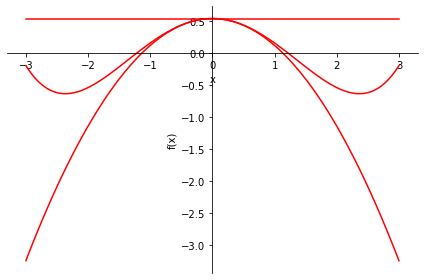

In [262]:
#3.10

#可以使用sympy.series函数
import sympy as sym
x = sym.symbols('x')
formula = sym.cos(sym.sqrt(x**2+1))
f1 = sym.series(formula,x,0,1).removeO()
f3 = sym.series(formula,x,0,3).removeO()
f5 = sym.series(formula,x,0,5).removeO()
sym.pprint(f1)#1阶
sym.pprint(f3)#3阶
sym.pprint(f5)#5阶
sym.plot((f1,(x,-3,3)),(f3,(x,-3,3)),(f5,(x,-3,3)),line_color = 'r')

[[ 0.          0.          4.5         0.          8.91800933  0.85509858
  12.99959308  2.75000597 16.35640054  5.7469784  18.62196582  9.63506456
  19.74149169 13.99358057 20.03124502 18.48424233 19.97536056 22.9838953
  20.08444862 27.48257286]
 [20.          0.         20.          3.         20.          6.
  20.          9.         20.         12.         20.         15.
  20.         18.         20.         21.         20.         24.
  20.         27.        ]]


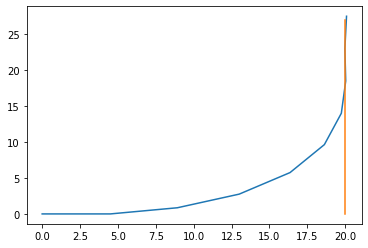

In [288]:
#3.11

#最终计算结果为9秒钟左右
import numpy as num
import numpy.linalg as ng
import matplotlib.pyplot as plt
N = 2 #需要更新位置的即是兔子和猎狗两个对象
vr = 3#兔子的速度为3m/s
vd = 4.5 #猎狗的速度为4.5m/s
times = 9#设定初步的追逐时间
divs = 10
T = np.linspace(0,times,divs)
# print(T)#可以简要查看一下位置的更新迭代时间
dt = T[1] -T[0]
xy = np.array([[0,0],[20,0]])#初始位置，猎狗与兔子
Txy = xy#Txy用来存储所有的xy坐标
xyn = np.empty((2,2))#空矩阵用来接收更新的兔子和猎狗的位置
for n in range (1,len(T)):#每个时间点一次循环
    for i in [0,1]:#只有两个待更行对象
        j = (i+1)%2
        dxy = xy[j]-xy[i]#两者的相对位置
        dd = dxy/ng.norm(dxy)#单位化向量，相当于给与了运动的方向
        if i ==0:
            xyn[i] = xy[i] + vd*dt*dd #猎狗的位置更新
        else:
            xyn[i] = [20,xy[i][1]+vr*dt]#兔子的位置更新
    Txy = np.c_[Txy,xyn]#矩阵存储当前的坐标
    xy = xyn.copy()#更新时刻点的xy坐标
print(Txy)
for i in range(N):
    plt.plot(Txy[i,::2],Txy[i,1::2])
plt.show()

In [303]:
#3.12

#（1）
import numpy as np
from scipy.integrate import quad,dblquad
f = lambda x: np.exp(-x)*np.sin( np.sqrt(x**2+2))
print('一重积分计算结果为：', quad(f,0,np.inf))#返回值有两个，第一个值是积分的值，第二个值是对积分值的绝对误差估计。
#（2）对于2问中，可以将积分划分为（0,1）及（1,4）区域
f1 = lambda y,x:x**2+2*y**2
bd1 = lambda x:np.sqrt(x)
bd2 = lambda x:x-2
value1,err1 = dblquad(f1,0,1,lambda x: -bd1(x),bd1)#输出值和误差
value2,err2= dblquad(f1,1,4,lambda x:bd2(x),bd1)
print("二重积分的值为：",value1+value2)
#（3）三重积分
# x**2+y**2= p**2 = z，说明曲面半径为np.sqrt（z）,则曲面面积为np.pi*z
print('三重积分计算结果为：', quad(lambda z:z*np.pi*z,0,4))

一重积分计算结果为： (0.8328534212790222, 1.2431818039574587e-08)
二重积分的值为： 21.40714285713916
三重积分计算结果为： (67.02064327658225, 7.440786129085081e-13)


In [332]:
#3.13

#求极值点
from scipy.optimize import fminbound
x = sym.symbols('x')
expr1 = 2*sym.exp(-x)*sym.sin(x)
expr1_x = sym.diff(expr1,x)
print(expr1_x)#输出一阶导
sym.pprint(sym.solveset(expr1_x,x))#输出一阶导为0的点，可见三角函数的解有无穷多个
#当n为0时，一阶导为0的点为sym.pi/4,5*sym.pi/4
f= lambda x:2*np.exp(-x)*np.sin(x)
print('极大值为：{}'.format(f(np.pi/4)))
print('极小值为：{}'.format(f(5*np.pi/4)))

-2*exp(-x)*sin(x) + 2*exp(-x)*cos(x)
⎧        5⋅π │      ⎫   ⎧        π │      ⎫
⎨2⋅n⋅π + ─── │ n ∊ ℤ⎬ ∪ ⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩         4  │      ⎭   ⎩        4 │      ⎭
极大值为：0.644793883889669
极小值为：-0.027864070195388408


In [339]:
#3.14

#旋转一周形成葫芦一样的柱体
#（1）求体积，将图像分割为-2<=y<=1,1<y<=4两部分
from scipy.integrate import quad
func1 = lambda y:np.pi*(4-y**2)
func2 = lambda y:np.pi*(4-(y-2)**2)
val1,er1 = quad(func1,-2,1)#下半部分旋转的体积
print(val1)
val2,er2 = quad(func2,1,4)#上半部分旋转的体积
print(val2)
print(val1+val2)#最终的合并体积  #可以整体使用sympy求符号解
#（1）求做功(功 = 力*距离，水的质量 = 水的体积*水的密度，力F = mg，可以先求单位体积的做功，再求整体的微分)
p = 1*10**3 #水的密度
g = 9.8 #重力加速度
func3 = lambda y: p*g*(2-y)*np.pi*(4-y**2)
func4 = lambda y: p*g*(2-y)*np.pi*(4-(y-2)**2)
val3,err3 = quad(func3,-2,1) #抽取下班部分水所做的功
val4,err4 = quad(func4,1,4) #抽取上半部分水做的功
print(val3+val4)#最终计算出来的做功

28.27433388230814
28.27433388230814
56.54866776461628
554176.9440932396


In [341]:
#3.15

#参考文档：https://www.docin.com/p-1853085899.html
#可以不进行单位的换算，直接计算
#（1）
'''
飞机的速度为V，则减速伞的阻力f = -kv
牛顿第二定律F（合） = ma,应用牛顿第二定律可得到：m*dv/dt = -kv
为得到速度与距离之间的关系将dv/dt改写为dv/dx*dx/dt = v*dv/dx
将此式子代入上牛顿第二定律推导式，则dv = -k/m*dx，
对左右两边同时积分(左边vo--vt，右边想x = x（t）),求出K = m*（v0-vt）/x(t)
'''
m = 5000 #飞机重量
v0 = 800 #初速度为800
x = 500 #飞机滑行的距离
vt =100 #飞机最后的末速度
k = m *(v0-vt)/ x
print('阻力系数为：',k)
#(2)
'''
即相同的阻力系数
由于m*dv/dt = -kv，则dv/v =- k/m*dt,同样应用上问中的定义域积分方法
求解出v(t),再利用dx/dt = v(t)，再次积分，求出x（t）
'''
m2 = 8000
v2 = 600
f = lambda t :m2*v2/k*(1-np.exp(-k/m*t))#该方程小于等于m2*v2/k
print('安全距离为:',m2*v2/k)#685<1200,所以能够安全着陆

阻力系数为： 7000.0
安全距离为: 685.7142857142857


In [343]:
#3.16

#求二元函数的局部极小点
from scipy.optimize import minimize
f = lambda x: 100*(x[1]-x[0]**2)**2+(1-np.sin(x[0]))**2*np.cos(x[1])
x0 = minimize(f,[2.0,2.0],)
print('局部极小点为：{}，极小值为：{}'.format(x0.x,x0.fun))

局部极小点为：[1.31759894 1.73607197]，极小值为：-0.00016724663812221996
